In [85]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from weather_config import api_key
import numpy as np
from citipy import citipy
import random
import json
from scipy.stats import linregress
from sklearn import datasets

In [86]:
# Creating list of cities (Note: Adding 650 to ensure 500 unique are found in the API calls)
cities_list = []

for i in range(0,2000):
    if len(cities_list) < 650:
        lat = random.randint(-90,90)
        long = random.randint(-180,180)
        city = citipy.nearest_city(lat, long).city_name
        if city not in cities_list:
            cities_list.append(city)
        else:
            continue
    else:
        break

# Check for 650 unique cities
cities_df = pd.DataFrame(cities_list)
cities_df.nunique()

0    650
dtype: int64

In [87]:
# Creating Query URL base
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=e20c3b6406318b2050644f004b124d1a&units=imperial&q=


In [88]:
# set up lists to hold reponse info
lat = []
lon = []
temp = []
name = []
humidity = []
wind = []
cloudiness = []
counter = 1

# Loop through the list of cities and perform a request for data on each
for city in cities_list:
    if len(name) < 500:
        try:
            response = requests.get(query_url + city).json()
            temp.append(response['main']['temp'])
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            name.append(response['name'])
            humidity.append(response['main']['humidity'])
            wind.append(response['wind']['speed'])
            cloudiness.append(response['clouds']['all'])
            city_name = response['name']
            print(f"{counter}:" + city_name + " - Successfully added.")
            counter += 1
        except:
            print(city + " not found.")
    else:
        break
        
        
dict = {'Name': name, 
        'Latitude (°)': lat,
        'Longitude (°)': lon,
        'Temperature (F)': temp, 
        'Humidity (%)': humidity, 
        'Wind Speed (mph)': wind, 
        'Cloudiness (%)': cloudiness
       }    
city_weather = pd.DataFrame(dict)
city_weather


belushya guba not found.
1:Aklavik - Successfully added.
2:Sistranda - Successfully added.
3:Punta Arenas - Successfully added.
4:Manakara - Successfully added.
5:Albany - Successfully added.
6:Mataura - Successfully added.
7:Upernavik - Successfully added.
8:Busselton - Successfully added.
9:Byron Bay - Successfully added.
10:Sandakan - Successfully added.
11:Kungurtug - Successfully added.
12:Cherskiy - Successfully added.
13:Nikolskoye - Successfully added.
14:Binzhou - Successfully added.
hunza not found.
15:Norman Wells - Successfully added.
16:Avarua - Successfully added.
17:Barrow - Successfully added.
18:Poum - Successfully added.
19:Hermanus - Successfully added.
20:Swan Hill - Successfully added.
21:Clyde River - Successfully added.
22:Hasaki - Successfully added.
23:Sānchor - Successfully added.
24:Saint-Philippe - Successfully added.
25:Manado - Successfully added.
sentyabrskiy not found.
26:Bluff - Successfully added.
27:Kaitangata - Successfully added.
28:Cadiz - Successf

217:Bambous Virieux - Successfully added.
218:Hikari - Successfully added.
219:Chabahar - Successfully added.
220:Ribeira Grande - Successfully added.
221:Grand Gaube - Successfully added.
222:Lorengau - Successfully added.
warqla not found.
223:Antofagasta - Successfully added.
224:Jalu - Successfully added.
225:Cody - Successfully added.
226:Bubaque - Successfully added.
grand river south east not found.
227:Voyvozh - Successfully added.
228:Tiksi - Successfully added.
229:Pulaski - Successfully added.
230:Ichinoseki - Successfully added.
231:Chokurdakh - Successfully added.
232:San Vicente - Successfully added.
attawapiskat not found.
233:Acapulco de Juárez - Successfully added.
234:Wenling - Successfully added.
235:Chifeng - Successfully added.
236:Aksu - Successfully added.
237:Arroyo de la Encomienda - Successfully added.
238:Savannah Bight - Successfully added.
239:Fairbanks - Successfully added.
240:Lawrenceburg - Successfully added.
241:Bahía de Caráquez - Successfully added.


434:Monrovia - Successfully added.
435:Bilibino - Successfully added.
436:Alta Floresta - Successfully added.
437:Varberg - Successfully added.
438:Antalaha - Successfully added.
439:Lapua - Successfully added.
440:Zhangye - Successfully added.
441:Torbay - Successfully added.
442:Storsteinnes - Successfully added.
443:Nastola - Successfully added.
444:Dabakala - Successfully added.
445:Diu - Successfully added.
446:Ruska Poliana - Successfully added.
447:Pyinmana - Successfully added.
448:Bay Roberts - Successfully added.
449:Miami - Successfully added.
450:Piney Green - Successfully added.
451:Hirara - Successfully added.
452:Korla - Successfully added.
453:Neuquén - Successfully added.
kracheh not found.
454:Acajutla - Successfully added.
455:Chara - Successfully added.
456:Karratha - Successfully added.
457:Loja - Successfully added.
458:Marolambo - Successfully added.
459:Coquimbo - Successfully added.
460:Gunjur - Successfully added.
461:Ketchikan - Successfully added.
462:Tilich

,Name,Latitude (°),Longitude (°),Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%)
0,Aklavik,68.22,-135.01,35.60,93,4.70,90
1,Sistranda,63.73,8.83,53.60,93,11.41,75
2,Punta Arenas,-53.15,-70.92,42.39,81,12.75,98
3,Manakara,-22.13,48.02,64.31,89,7.02,0
4,Albany,42.60,-73.97,41.67,58,3.91,0
...,...,...,...,...,...,...,...
495,Dakar,14.69,-17.44,78.80,88,3.36,20
496,Charters Towers,-20.10,146.27,87.89,35,13.15,0
497,Sept-Îles,50.20,-66.38,30.20,92,3.36,5
498,San Jose,37.34,-121.89,76.28,44,12.75,75


In [89]:
city_weather.sort_values(by='Latitude (°)', ascending=True)

,Name,Latitude (°),Longitude (°),Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%)
86,Ushuaia,-54.80,-68.30,42.80,82,4.70,75
2,Punta Arenas,-53.15,-70.92,42.39,81,12.75,98
25,Bluff,-46.60,168.33,53.37,62,7.43,85
26,Kaitangata,-46.28,169.85,57.99,63,5.99,0
5,Mataura,-46.19,168.86,60.39,45,9.13,62
...,...,...,...,...,...,...,...
69,Khatanga,71.97,102.50,44.91,76,8.72,16
6,Upernavik,72.79,-56.15,29.03,88,7.70,89
38,Dikson,73.51,80.55,40.69,92,15.39,100
140,Qaanaaq,77.48,-69.36,16.18,92,3.67,80


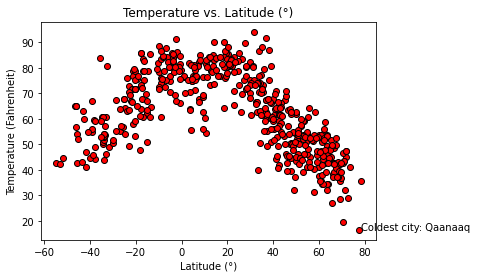

In [65]:
# Temperature
coldest = city_weather.loc[(city_weather['Temperature (F)'] == (city_weather['Temperature (F)'].min()))]
coldest
coldest_x = coldest.iloc[0]['Latitude (°)'] + 1
coldest_y = coldest.iloc[0]['Temperature (F)']
coldest_name = coldest.iloc[0]['Name']

plt.annotate(xy=[coldest_x, coldest_y], text="Coldest city: " + coldest_name)
plt.scatter(lat, temp, marker="o", facecolors="red", edgecolors="black")
plt.title("Temperature vs. Latitude (°)")
plt.xlabel("Latitude (°)")
plt.ylabel("Temperature (Fahrenheit)")
plt.savefig("../WeatherPy/temp_lat.png")
plt.show()

Observations:
1. Not surprisingly, the plot shows the warmest cities around 0 degrees latitude (i.e. Earth's equator) and temperatures falling as they move farther north and south.
2. Many more cities are found in the northern hemisphere, and there are more cities located closer to the North Pole than cities located near the South Pole. This is also intuitive as there is more land mass closer to the North Pole than South Pole.

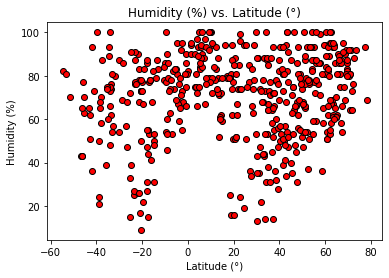

In [66]:
# Humidity
plt.scatter(lat, humidity, marker="o", facecolors="red", edgecolors="black")
plt.title("Humidity (%) vs. Latitude (°)")
plt.xlabel("Latitude (°)")
plt.ylabel("Humidity (%)")
plt.savefig("../WeatherPy/humidity_lat.png")
plt.show()

Observations:

Low humidity (i.e. less than 50%) cities are mostly clustered around 40-50 degrees north of the equator. Northern hemisphere cities grow much more humid as they approach either the North Pole or Equator. (I would need to study more about how humidity works to confidently say why this is.) :-)

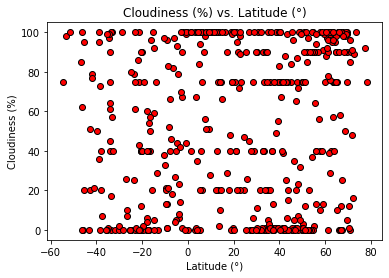

In [67]:
# Cloudiness
plt.scatter(lat, cloudiness, marker="o", facecolors="red", edgecolors="black")
plt.title("Cloudiness (%) vs. Latitude (°)")
plt.xlabel("Latitude (°)")
plt.ylabel("Cloudiness (%)")
plt.savefig("../WeatherPy/clouds_lat.png")
plt.show()

Observations:

Cloudiness measurements appear to often fall into buckets (e.g. 0%, 40%, 100%) as opposed to cloudiness being more specifically measured. I was curious about this and Googled to learn that cloudiness is officially measured in integer units called oktas. This would explain some bucketing... though I would need to do more research to determine why not all of the measurements are evenly bucketed. 

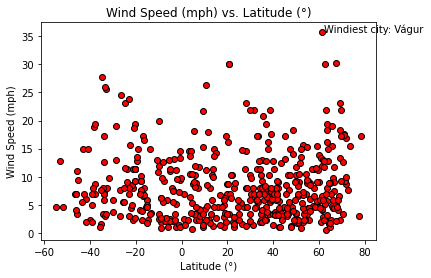

In [68]:
# Wind Speed
windiest = city_weather.loc[(city_weather['Wind Speed (mph)'] == (city_weather['Wind Speed (mph)'].max()))]
windiest
windiest_x = windiest.iloc[0]['Latitude (°)'] + 1
windiest_y = windiest.iloc[0]['Wind Speed (mph)']
windiest_name = windiest.iloc[0]['Name']

plt.annotate(xy=[windiest_x, windiest_y], text="Windiest city: " + windiest_name)
plt.scatter(lat, wind, marker="o", facecolors="red", edgecolors="black")
plt.title("Wind Speed (mph) vs. Latitude (°)")
plt.xlabel("Latitude (°)")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../WeatherPy/wind_lat.png")
plt.show()

Observations:

1. Most cities have average wind speeds under 10 mph.
2. There does not appear to be much correlation between latitude and wind speed.

In [69]:
# Creating categories
dict = {'City':name,
        'Temp':temp,
        'Lat':lat,
        'Wind':wind,
        'Humidity':humidity,
        'Cloudiness':cloudiness}

cities_df = pd.DataFrame(dict)
cities_df
north_cities = cities_df.loc[cities_df['Lat'] >= 0]
north_cities
south_cities = cities_df.loc[cities_df['Lat'] < 0]
south_cities

north_lat = north_cities['Lat']
north_city = north_cities['City']
north_temp = north_cities['Temp']
north_wind = north_cities['Wind']
north_humidity = north_cities['Humidity']
north_cloudiness = north_cities['Cloudiness']

south_lat = south_cities['Lat']
south_name = south_cities['City']
south_temp = south_cities['Temp']
south_wind = south_cities['Wind']
south_humidity = south_cities['Humidity']
south_cloudiness = south_cities['Cloudiness']

In [70]:
city_weather.sort_values(by='Temperature (F)', ascending=False).head(5)

,Name,Latitude (°),Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%)
418,Sonoita,31.85,93.99,22,7.00,0
84,Saint George,37.10,91.78,14,12.75,1
43,Barabai,-2.58,91.36,55,1.07,1
305,Santa Rosa,14.31,90.34,62,4.70,20
394,Arlit,18.74,90.16,16,5.84,0


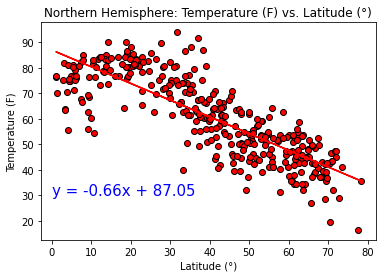

The linear regression equation is: y = -0.66x + 87.05
The r-squared is: 0.6704515426853764


In [71]:
# Northern Hemisphere - Temp vs. Latitude 
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_temp, marker="o", facecolors="red", edgecolors="black")
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="blue")
plt.title("Northern Hemisphere: Temperature (F) vs. Latitude (°)")
plt.xlabel("Latitude (°)")
plt.ylabel("Temperature (F)")
plt.savefig("../WeatherPy/north_temp_lat.png")
plt.show()
print(f"The linear regression equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

Observations:

1. Temperature and latitude are very strongly correlated, not surprisingly.
2. I would guess altitude largely explains the outliers, but that will take more research to validate.

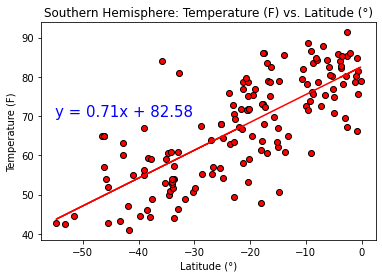

The linear regression equation is: y = 0.71x + 82.58
The r-squared is: 0.571454756947158


In [72]:
# Southern Hemisphere - Temp vs. Latitude 
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_temp, marker="o", facecolors="red", edgecolors="black")
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="blue")
plt.title("Southern Hemisphere: Temperature (F) vs. Latitude (°)")
plt.xlabel("Latitude (°)")
plt.ylabel("Temperature (F)")
plt.savefig("../WeatherPy/south_temp_lat.png")
plt.show()
print(f"The linear regression equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

Observations:

Temperature and latitude are still somewhat correlated in the Southern hemisphere but not as much as they are in the Northern hemisphere. This could possibly be due to there being very few cities within 40 degrees of the South Pole.

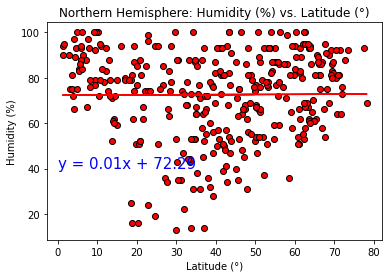

The linear regression equation is: y = 0.01x + 72.29
The r-squared is: 4.3785914767637515e-05


In [73]:
# Northern Hemisphere - Humidity vs. Latitude 
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humidity)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_humidity, marker="o", facecolors="red", edgecolors="black")
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="blue")
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude (°)")
plt.xlabel("Latitude (°)")
plt.ylabel("Humidity (%)")
plt.savefig("../WeatherPy/north_humidity_lat.png")
plt.show()
print(f"The linear regression equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

Observation:

Somewhat surprisingly to me, humidity and latitude have almost no correlation.

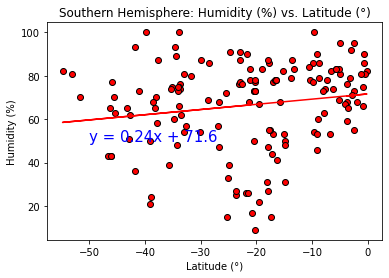

The linear regression equation is: y = 0.24x + 71.6
The r-squared is: 0.02670559664492912


In [74]:
# Southern Hemisphere - Humidity vs. Latitude 
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humidity)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_humidity, marker="o", facecolors="red", edgecolors="black")
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="blue")
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude (°)")
plt.xlabel("Latitude (°)")
plt.ylabel("Humidity (%)")
plt.savefig("../WeatherPy/south_humidity_lat.png")
plt.show()
print(f"The linear regression equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

Observation:

Humidity and latitude have almost no correlation.

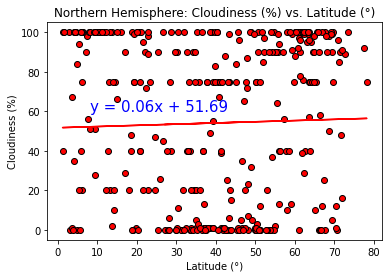

The linear regression equation is: y = 0.06x + 51.69
The r-squared is: 0.000870149325622566


In [75]:
# Northern Hemisphere - Cloudiness vs. Latitude 
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloudiness)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_cloudiness, marker="o", facecolors="red", edgecolors="black")
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(8,60),fontsize=15,color="blue")
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude (°)")
plt.xlabel("Latitude (°)")
plt.ylabel("Cloudiness (%)")
plt.savefig("../WeatherPy/north_cloudiness_lat.png")
plt.show()
print(f"The linear regression equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

Observation:

Cloudiness and latitude have almost no correlation.

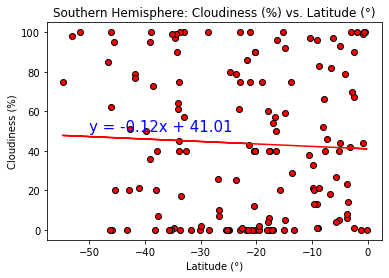

The linear regression equation is: y = -0.12x + 41.01
The r-squared is: 0.0021192088343102117


In [76]:
# Southern Hemisphere - Cloudiness vs. Latitude 
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloudiness)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_cloudiness, marker="o", facecolors="red", edgecolors="black")
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="blue")
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude (°)")
plt.xlabel("Latitude (°)")
plt.ylabel("Cloudiness (%)")
plt.savefig("../WeatherPy/south_cloudiness_lat.png")
plt.show()
print(f"The linear regression equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

Observation:

Cloudiness and latitude have almost no correlation.

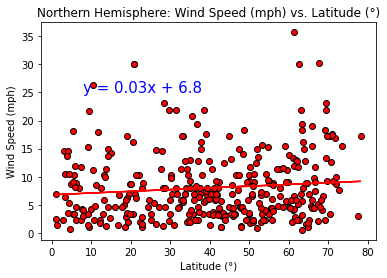

The linear regression equation is: y = 0.03x + 6.8
The r-squared is: 0.010647861561236104


In [77]:
# Northern Hemisphere - Wind Speed vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_wind, marker="o", facecolors="red", edgecolors="black")
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(8,25),fontsize=15,color="blue")
plt.title("Northern Hemisphere: Wind Speed (mph) vs. Latitude (°)")
plt.xlabel("Latitude (°)")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../WeatherPy/north_wind_lat.png")
plt.show()
print(f"The linear regression equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

Observation:

Wind speed and latitude have almost no correlation.

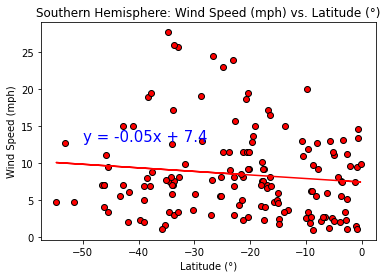

The linear regression equation is: y = -0.05x + 7.4
The r-squared is: 0.01362968982158626


In [78]:
# Southern Hemisphere - Wind Speed vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_wind, marker="o", facecolors="red", edgecolors="black")
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-50,13),fontsize=15,color="blue")
plt.title("Southern Hemisphere: Wind Speed (mph) vs. Latitude (°)")
plt.xlabel("Latitude (°)")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../WeatherPy/south_wind_lat.png")
plt.show()
print(f"The linear regression equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

Observation:

Wind speed and latitude have almost no correlation.


In [90]:
# Saving retrieved weather data to CSV
city_weather.to_csv("retrieved_weather_data.csv",
                  encoding="utf-8", index=False, header=True)